# Assignment 2:Set up the work for data-driven inference based on CitiBike data.

- States the question you want to ask, and formulates the Null and Alternative hypothesis (remember the confidence level!) in words and as a formula. You will not test the hypothesis yet! please do not do it even as extra credit (others will do your hypothesis)

In [70]:
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

if os.getenv ('PUI2018') is None:
    print ("Must set env variable PUI2018")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2018")

import os
import json
params = {'legend.fontsize': 20,
          'legend.handlelength': 2}
pl.rcParams.update(params)

Populating the interactive namespace from numpy and matplotlib
Must set env variable PUI2018


- Citybike bikers who are more than 60 tend to be more affected by cold weather.

### Null Hypothesis: The proportion of decrese of elder people(over 60 years old) from January to August is more or same to people who are under 60.

$H_0$ : $\frac{E{\mathrm{summer}}-E{\mathrm{winter}}}{E{\mathrm{summer}}} - \frac{Y{\mathrm{summer}}-Y{\mathrm{winter}}/{Y_{\mathrm{summer}}} >= 0$

### Alternative Hypothesis: The proportion of decrease of elder people(over 60 years old) from January to August is less than the proportion of people who are under 60.

$H_1$ : $\frac{E{\mathrm{winter}}}{E{\mathrm{total}}} - \frac{Y{\mathrm{winter}}}{Y_{\mathrm{total}}} < 0$

significance level $a$ = 0.5

In [2]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [3]:
datestring = ['201501', '201502', '201503', '201504', '201505', '201506']
for date in datestring:
    getCitiBikeCSV(date)

file in place, you can continue
file in place, you can continue
file in place, you can continue
file in place, you can continue
file in place, you can continue
file in place, you can continue


In [4]:
df1 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring[0] + '-citibike-tripdata.csv')
df2 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring[1] + '-citibike-tripdata.csv')
df3 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring[2] + '-citibike-tripdata.csv')
df4 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring[3] + '-citibike-tripdata.csv')
df5 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring[4] + '-citibike-tripdata.csv')

In [5]:
frames = [df1, df2, df3, df4, df5]
df = pd.concat(frames)
df['date'] = pd.to_datetime(df['starttime'])
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00


In [6]:
df2 = df.dropna(subset=['birth year'])

In [7]:
df2['age'] = 2015 - df2['birth year'].astype(float)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [8]:
df2 = df2[['date','age']]

In [9]:
len(df2)

2184167

In [10]:
df2.head()

,date,age
0,2015-01-01 00:01:00,55.0
1,2015-01-01 00:02:00,52.0
2,2015-01-01 00:04:00,41.0
3,2015-01-01 00:04:00,46.0
4,2015-01-01 00:05:00,38.0


In [11]:
df2['eld'] = 0
df2.loc[df2.age >= 60 , 'eld'] = 1

In [12]:
print( len(df2), len(df2[df2.age >= 60 ]))

2184167 122192


In [13]:
df2.head()

,date,age,eld
0,2015-01-01 00:01:00,55.0,0
1,2015-01-01 00:02:00,52.0,0
2,2015-01-01 00:04:00,41.0,0
3,2015-01-01 00:04:00,46.0,0
4,2015-01-01 00:05:00,38.0,0


In [14]:
df2[df2['age'] >= 60].head()

,date,age,eld
66,2015-01-01 00:37:00,61.0,1
68,2015-01-01 00:38:00,79.0,1
97,2015-01-01 00:49:00,60.0,1
103,2015-01-01 00:53:00,60.0,1
111,2015-01-01 00:58:00,60.0,1


In [40]:
df_e = df2[df2['eld'] ==1 ]
df_y = df2[df2['eld'] ==0 ]

In [57]:
df_e_count = df_e['date'].groupby([df_e['date'].dt.strftime('%B')]).count()
df_y_count = df_y['date'].groupby([df_y['date'].dt.strftime('%B')]).count()

In [61]:
df_e_count = df_e_count.reindex(['January','February','March','April','May'])
df_y_count = df_y_count.reindex(['January','February','March','April','May'])

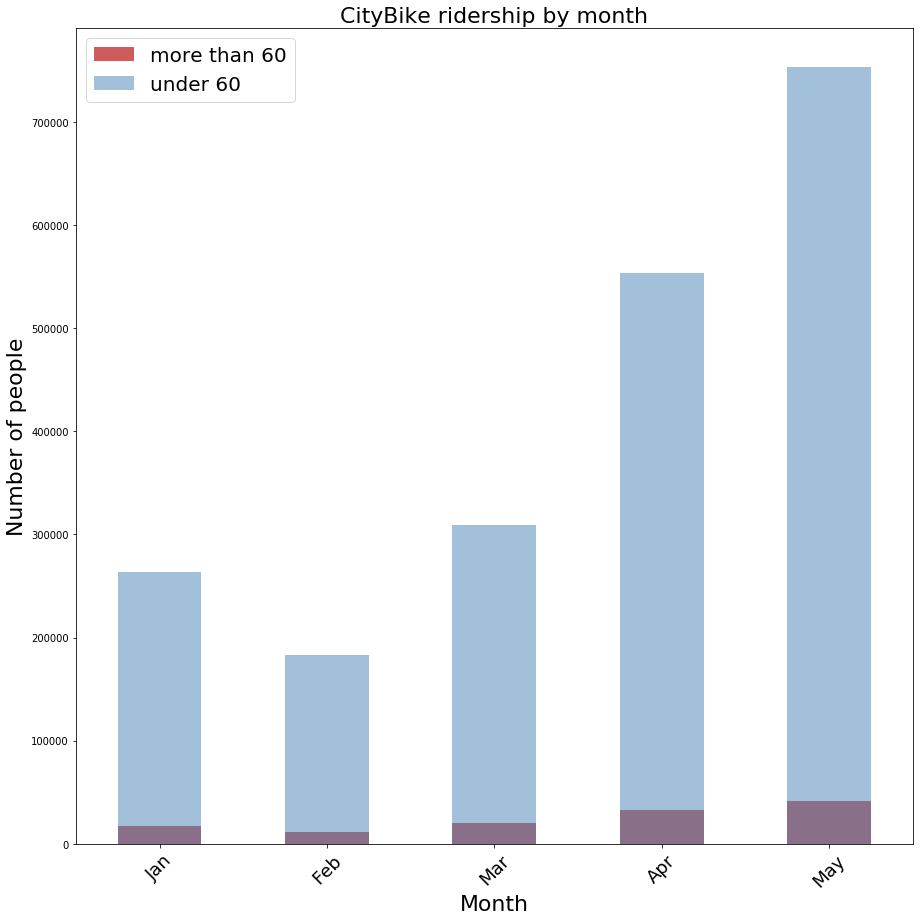

In [71]:
fig = pl.figure(figsize(15,15))
norm_e = 1
(df_e_count / norm_e).plot(kind="bar", 
                                                                                         color='IndianRed', 
                                                                                         label='more than 60')


norm_y = 1
ax = ( df_y_count/ norm_y).plot(kind="bar", 
                                                                                              color='SteelBlue', 
                                                                                              alpha=0.5,
                                                                                              label='under 60')


tmp = ax.xaxis.set_ticklabels(["Jan","Feb","Mar","Apr","May"],fontsize=18, rotation=45)
ax.set_xlabel("Month", fontsize = 22)
ax.set_ylabel("Number of people", fontsize = 22)
ax.set_title("CityBike ridership by month", fontsize = 22)
pl.legend()

## Figure 1a: Distribution of Citibike biker ridership by age over 60 from January 2015 to May 2015, absolute counts. It seems like under 60 group ride bike more, however it cannot be compared because this is absolute number.

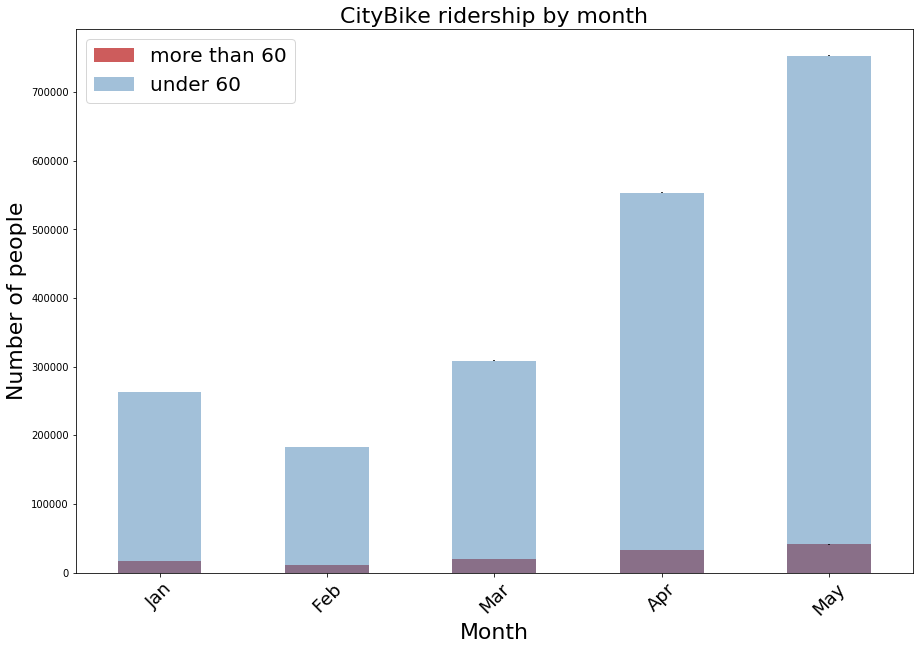

In [73]:
fig=pl.figure(figsize(15,10))

norm_e = 1
error_e = np.sqrt(df_e_count)
ax=((df_e_count) / norm_e).plot(kind="bar",color='IndianRed',  yerr=[
            ((error_e) / norm_e, (error_e) / norm_e)], label='more than 60')

norm_y = 1
error_y=np.sqrt(df_y_count)
((df_y_count) / norm_y).plot(kind="bar", alpha=0.5, yerr=[((error_y) / norm_y, (error_y) / norm_y)], 
                           color='SteelBlue', label='under 60')
tmp = ax.xaxis.set_ticklabels(["Jan","Feb","Mar","Apr","May"],fontsize=18, rotation=45)
ax.set_xlabel("Month", fontsize = 22)
ax.set_ylabel("Number of people", fontsize = 22)
ax.set_title("CityBike ridership by month", fontsize = 22)
pl.legend()

## Figure 1b: Distribution of Citibike biker's trip duration by age group from January 2015 to May 2015, absolute counts with statistical error.

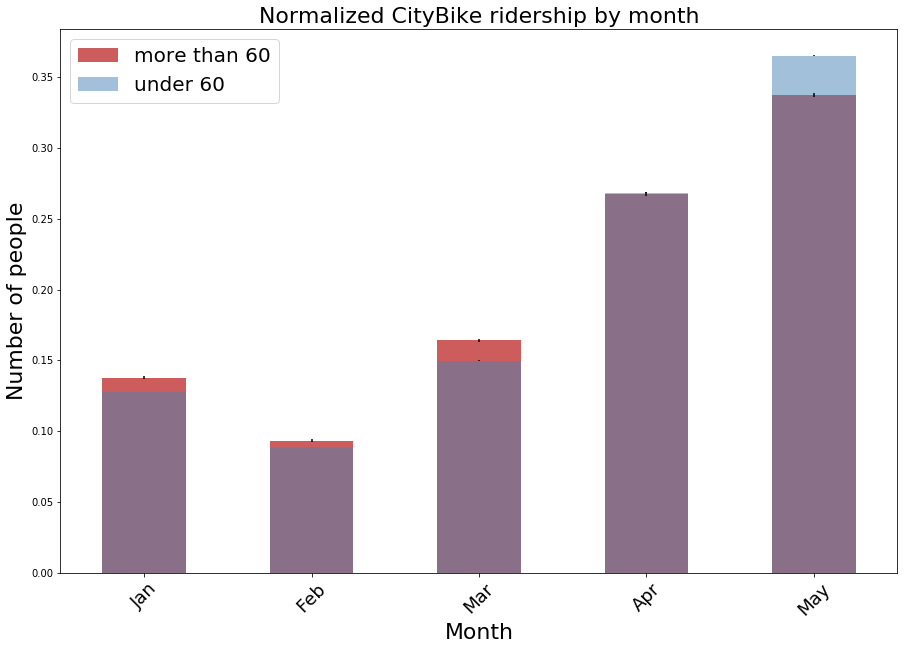

In [75]:
fig = pl.figure(figsize(15,10))

norm_e = df_e_count.sum()
error_e = np.sqrt(df_e_count)
((df_e_count) / norm_e).plot(kind="bar", color='IndianRed',  
                           yerr=[((error_e) / norm_e, (error_e) / norm_e)], 
                           label='more than 60')


norm_y = df_y_count.sum()
error_y = np.sqrt(df_y_count)
ax = ((df_y_count) / norm_y).plot(kind="bar", alpha=0.5, 
                                yerr=[((error_y) / norm_y, (error_y) / norm_y)], 
                                color='SteelBlue', label='under 60')

tmp = ax.xaxis.set_ticklabels(["Jan","Feb","Mar","Apr","May"],fontsize=18, rotation=45)
ax.set_xlabel("Month", fontsize = 22)
ax.set_ylabel("Number of people", fontsize = 22)
ax.set_title("Normalized CityBike ridership by month", fontsize = 22)
pl.legend()

## Figure 2: This is the distribution of Citibike bikers by age group From January 2015 to May 2015. Rider who is more than 60 tend to ride more bike in winter comparing to under 60.